## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score
from sklearn import metrics
import warnings
import sys
import joblib

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## 2. Load Dataset

In [3]:
df = pd.read_csv("dataset/marketing_campaign.csv", sep = "\t")

## 3. Explore Dataset

In [4]:
print("Rows, Columns")
df.shape

Rows, Columns


(2240, 29)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## 4. Dropping NaN Rows

In [9]:
df = df.dropna()
print("Total Number of data-points(Rows) after removing rows with NaN values:", len(df))

Total Number of data-points(Rows) after removing rows with NaN values: 2216


## 5. Data Cleaning

#### 5.1 Data-Time Encoding

In [10]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True, errors = 'coerce')
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print("Newsest Customer's enrolment date in records:", max(dates))
print("Oldest Customer's enrolment date in records:", min(dates))

Newsest Customer's enrolment date in records: 2014-06-29
Oldest Customer's enrolment date in records: 2012-07-30


#### 5.2. Feature Engineering

In [11]:
# Creating a feature ""Customer_For
days = []
d1 = max(dates)

for i in dates:
    delta = d1 - i
    days.append(delta)

df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors = "coerce")

In [12]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 



In [13]:
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [14]:
# Age of Customer today
df["Age"] = 2025-df["Year_Birth"]

In [15]:
# Total spendings on various items
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [16]:
# Deriving living situation by marital status "Alone"
df["Living_With"] = df["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
         "Absurd": "Alone",
         "Widow": "Alone",
         "YOLO": "Alone",
         "Divorced": "Alone",
         "Single": "Alone"
    }
)

In [17]:
# Feature indicating total children living in the household
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [18]:
# Feature for total memeber in the household
df["Family_Size"] = df["Living_With"].replace(
    {
        "Alone": 1,
        "Partner": 2
    }
) + df["Children"]

In [19]:
# Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)

In [20]:
# Segmenting education levels in three groups
df["Education"] = df["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undegraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "Phd": "Postgraduate"
    }
)

In [21]:
# For clarity
df = df.rename(columns = 
               {
                   "MntWines": "Wines",
                   "MntFruits": "Fruits",
                   "MntMeatProducts": "Meat",
                   "MntFishProducts": "Fish",
                   "MntSweetProducts": "Sweets",
                   "MntGoldProd": "Gold",
               }
              )

In [22]:
# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis = 1)

In [23]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,132.000000,2525.000000,3.000000,5.000000,1.000000


#### 5.3 Plotting Selected Features

In [24]:
# Setting up colors prefrences
sns.set(rc = 
       {
           "axes.facecolor": "#FFF9ED",
           "figure.facecolor": "#FFF9ED",
       })
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

Reletive Plot of Selected Features: A Data Subnet


<Figure size 800x550 with 0 Axes>

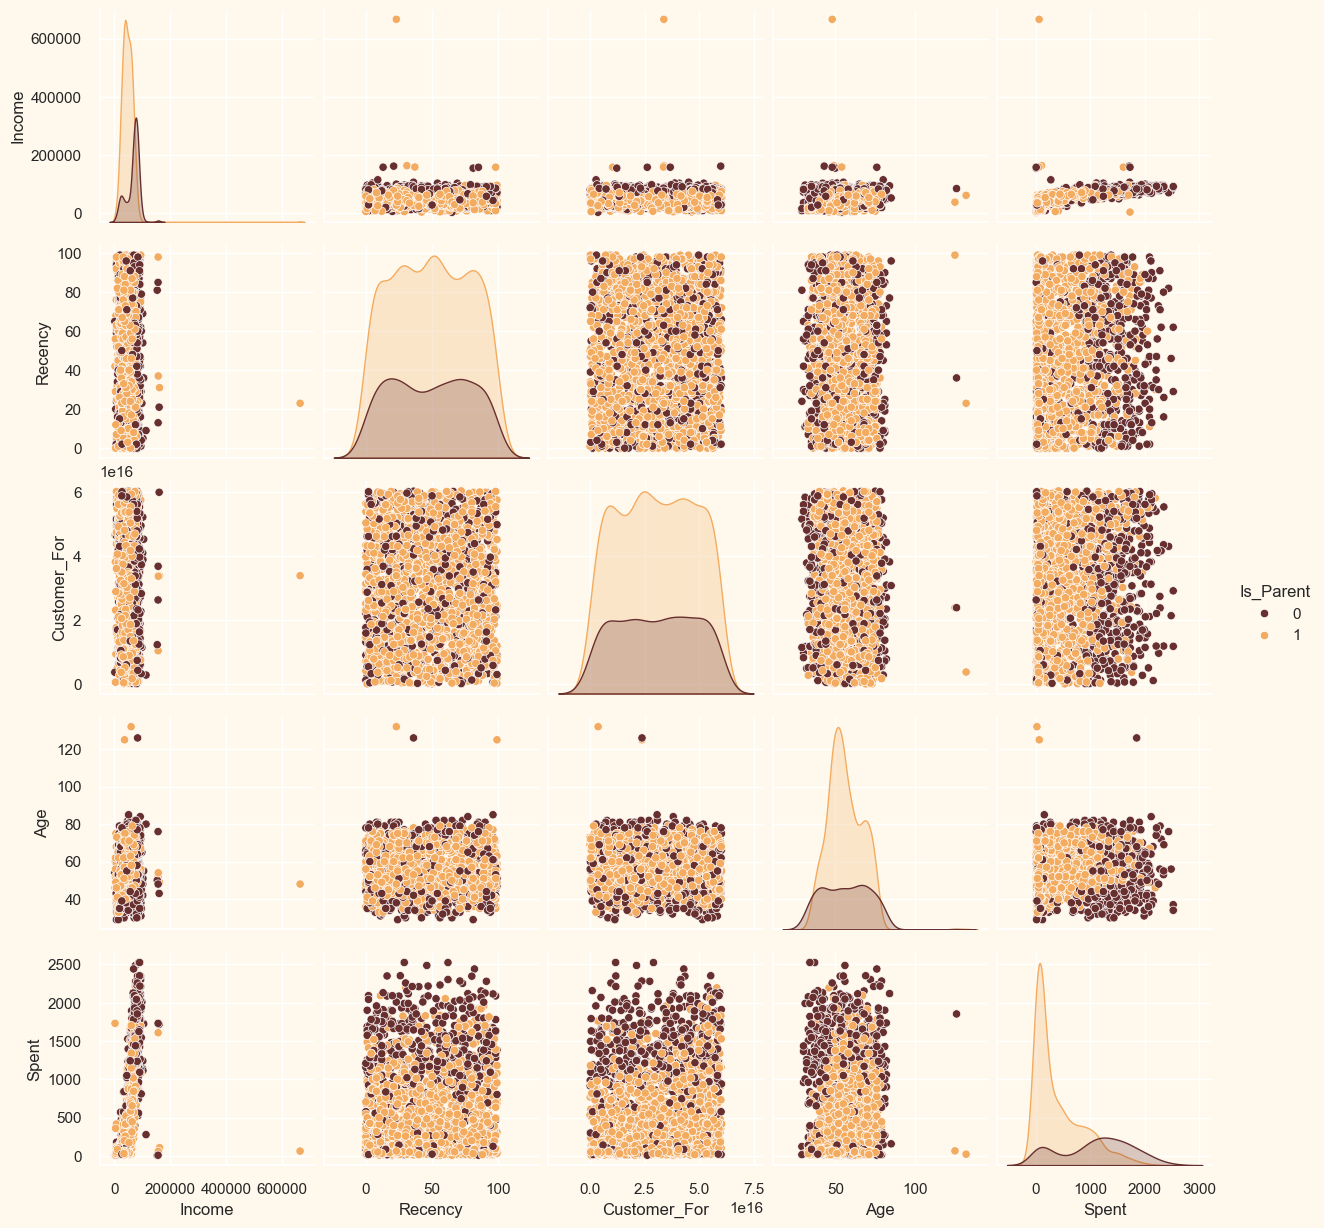

In [25]:
# Plotting Features
To_plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot of Selected Features: A Data Subnet")
plt.figure()
sns.pairplot(df[To_plot], hue = "Is_Parent", palette = (["#682F2F","#F3AB60"]))
plt.savefig("figures/Reletive_Plot_of_Selected_Feature.png", dpi = 300, bbox_inches = "tight")
plt.show()

#### 5.4 Removing Outliers

In [26]:
# Dropping outlieres by selecting a cap on Age and Income
df = df[(df["Age"] < 90)]
df = df[(df["Income"] < 600000)]
print("Total Number of data-points after removing the outliers are:", len(df))

Total Number of data-points after removing the outliers are: 2212


#### 5.5 Correlation Matrix

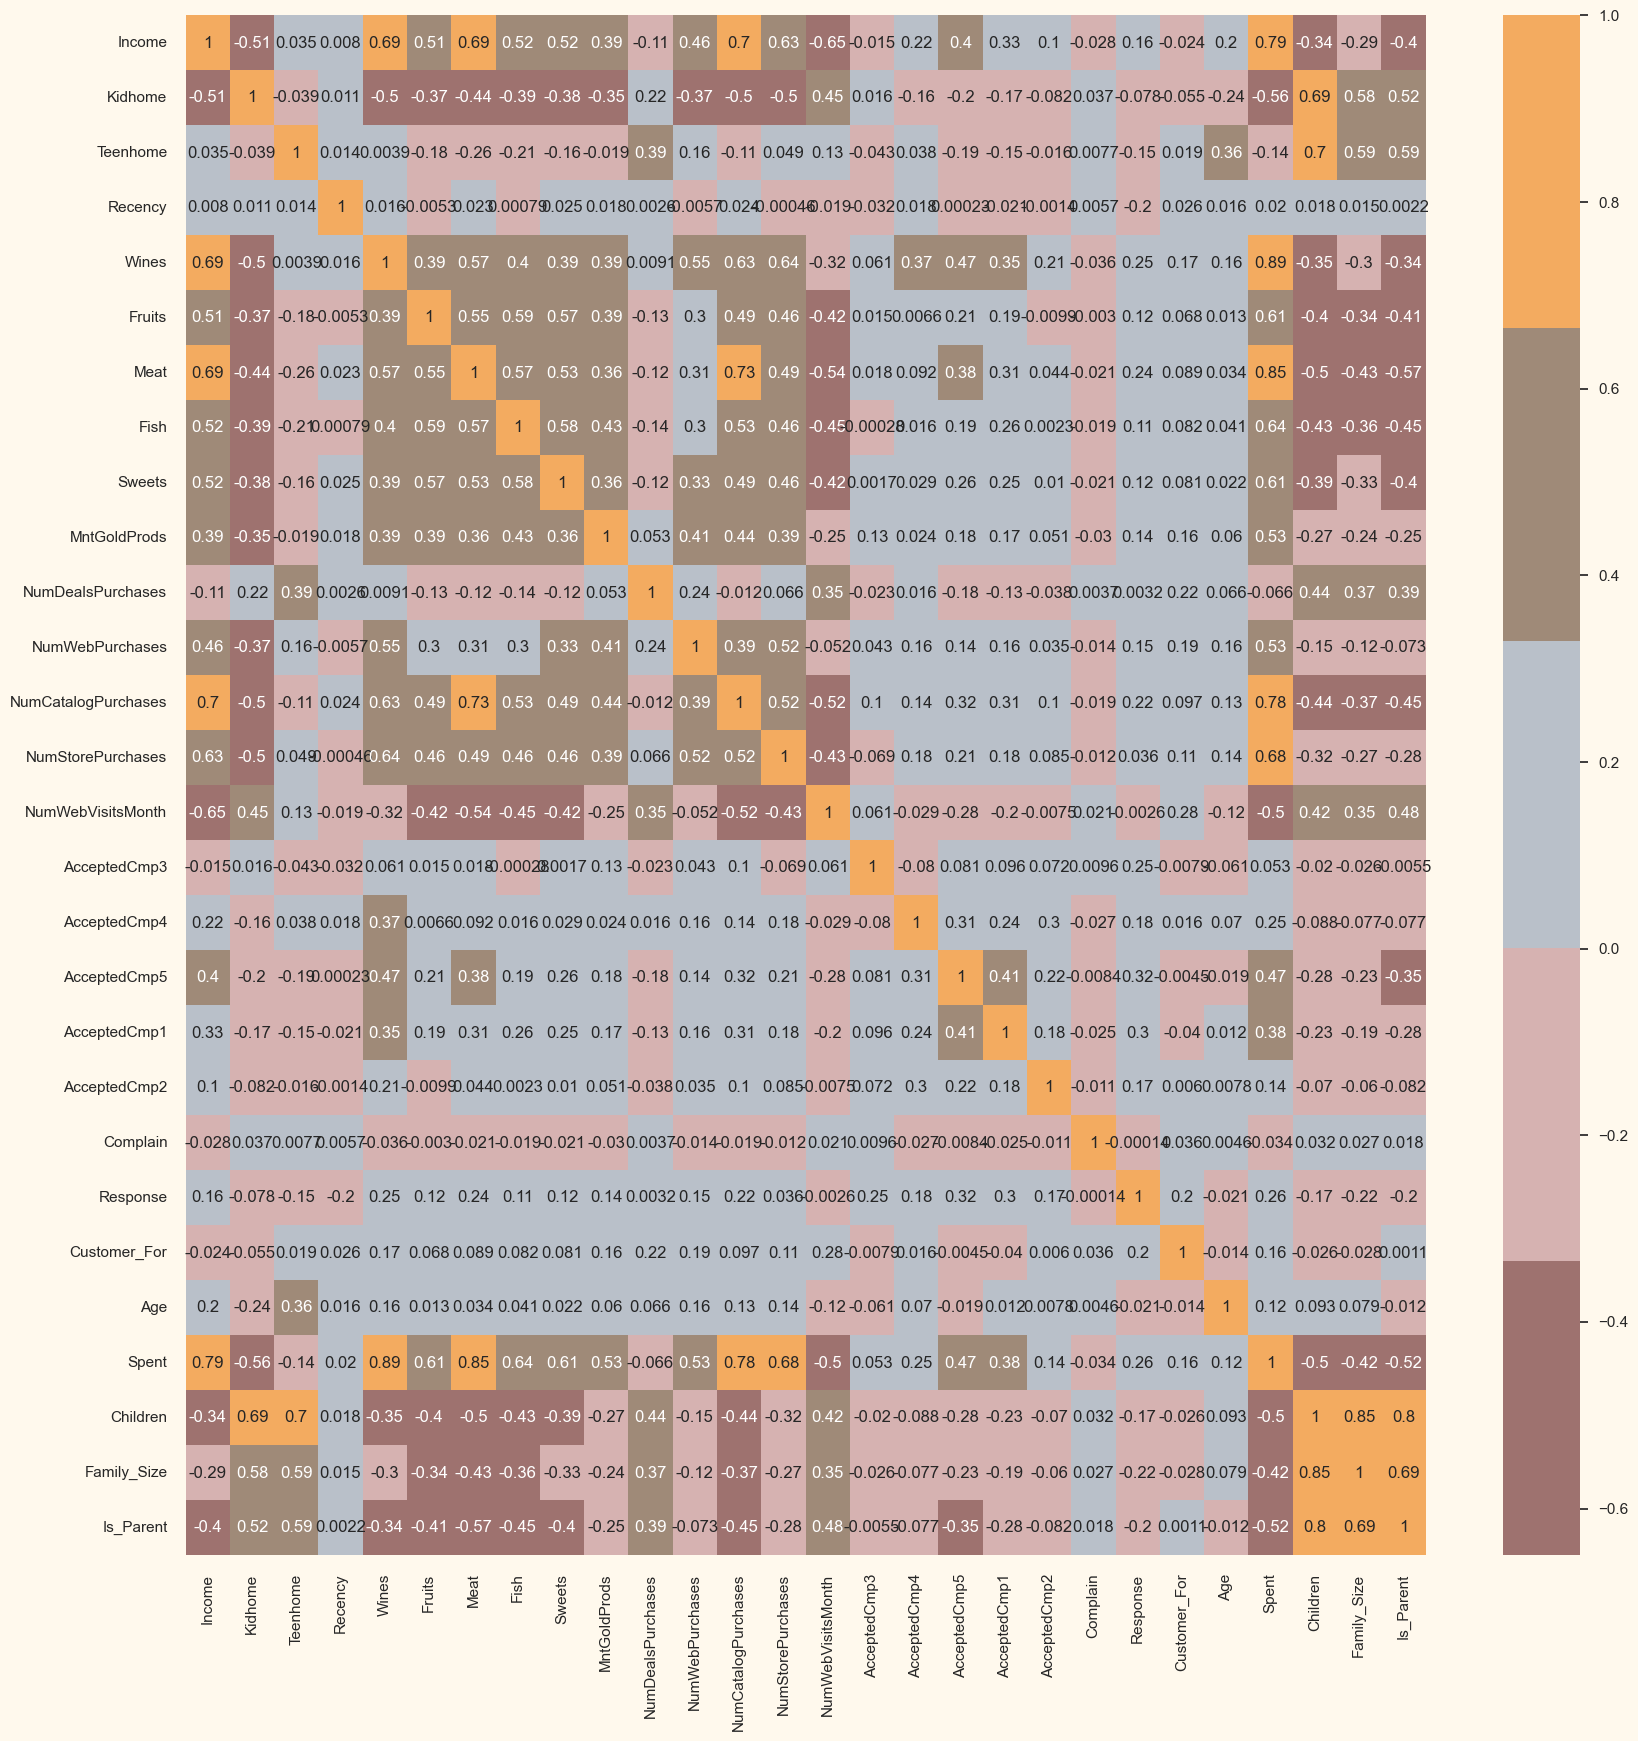

In [27]:
corrmat = df.select_dtypes(include = ['number']).corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, annot = True, cmap = cmap, center = 0)
plt.savefig("figures/Correlation_Matrix.png", dpi = 300, bbox_inches = "tight")
plt.show()

## 6. Data Preprocessing

In [28]:
# Listing the Categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variables in dataset:", object_cols)

Categorical Variables in dataset: ['Education', 'Living_With']


#### 6.1 Label Encoding

In [29]:
# from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in object_cols:
    LE = LabelEncoder()
    df[col] = LE.fit_transform(df[col])
    label_encoders[col] = LE    # store encoder for deployment

print("All features are now numerical Data Type:")
df.info()

All features are now numerical Data Type:
<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  N

In [30]:
# # Label Encoding the object types
# LE = LabelEncoder()
# for i in object_cols:
#     df[i] = df[[i]].apply(LE.fit_transform)

# print("All features are now numerical Data Type:")
# df.info()

In [31]:
# Creating a copy of data
ds = df.copy()
# Creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
ds = ds.drop(cols_del, axis = 1)

#### 6.2 Scaling the Data 

In [32]:
# Scaling Data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
scaler

StandardScaler()

In [33]:
# Scaled data to be used for reducing the Dimesionality
print("DataFrame to beused for further modelling:")
scaled_ds.head()

DataFrame to beused for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.82031,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.82031,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.82031,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.82031,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.07797,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


## 7. Dimensionality Reduction

#### 7.1 Dimenionality Reduction with PCA

In [63]:
# Initiating PCA to reduce dimentions aka fetures to 3
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = (["col1", "col2", "col3"]))
PCA_ds.describe()


,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,2.569775e-17,5.781993e-17,-2.208400e-17
std,2.879045e+00,1.711529e+00,1.232624e+00
min,-5.963536e+00,-4.220052e+00,-3.659686e+00
25%,-2.547630e+00,-1.335469e+00,-8.593003e-01
50%,-7.800375e-01,-1.828920e-01,-4.214500e-02
75%,2.400388e+00,1.233272e+00,8.600035e-01
max,7.434844e+00,6.182850e+00,6.693353e+00


In [64]:
pca

PCA(n_components=3)

#### 7.2 Plotting the reduced dataframe

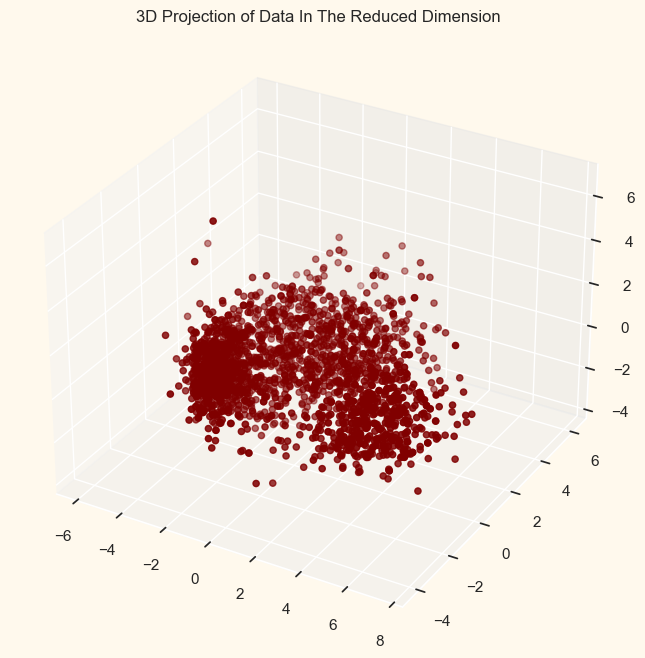

In [35]:
# 3D Projection of Data
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "maroon", marker = "o")
ax.set_title("3D Projection of Data In The Reduced Dimension")
plt.savefig("figures/3D_Projection_of_Data_In_The_Reduced_Dimension.png", dpi = 300, bbox_inches = "tight")
plt.show()

## 8. Clustering 

#### 8.1 Elbow Method

Elbow-Method to determine the number of clusters to be formed:


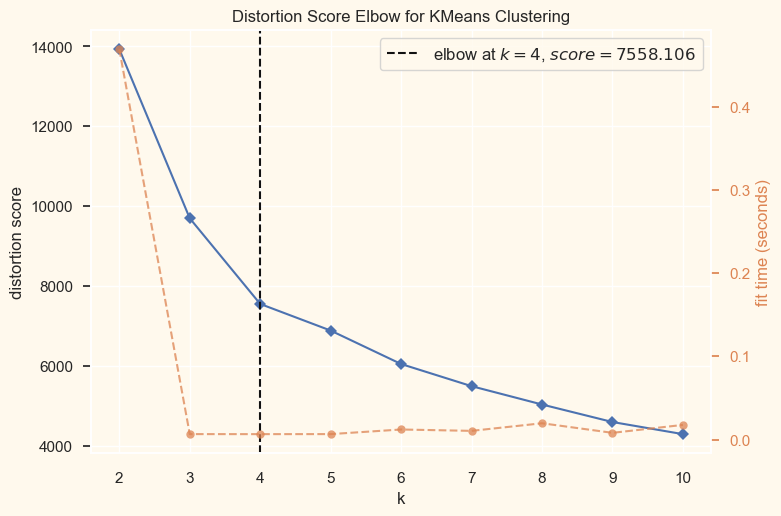

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Quick Examination of Elbow-Method to find the number of clusters to make.
print("Elbow-Method to determine the number of clusters to be formed:")
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
plt.savefig("figures/Elbow-Method_to_determine_the_number_of_clusters_to_be_formed.png", dpi = 300, bbox_inches = "tight")
Elbow_M.show()

#### 8.2 Agglomerative Clustering

In [37]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters = 4)
AC

AgglomerativeClustering(n_clusters=4)

In [38]:
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [39]:
# Add the Clusters feature to the original DataFrame
df["Clusters"] = yhat_AC

#### 8.3 Plotting the Clusters

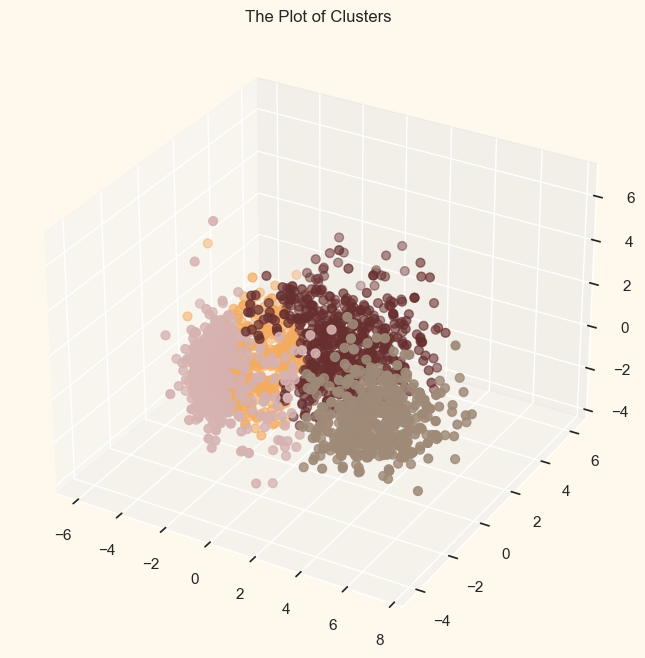

In [40]:
fig = plt.figure(figsize = (10, 8))
ax = plt.subplot(111, projection = '3d', label = "bla")
ax.scatter(x, y, z, s = 40, c = PCA_ds["Clusters"], marker = 'o', cmap = cmap)
ax.set_title("The Plot of Clusters")
plt.savefig("figures/The_Plot_of_Clusters.png", dpi = 300, bbox_inches = "tight")
plt.show()

## 9. Evaluating Models 

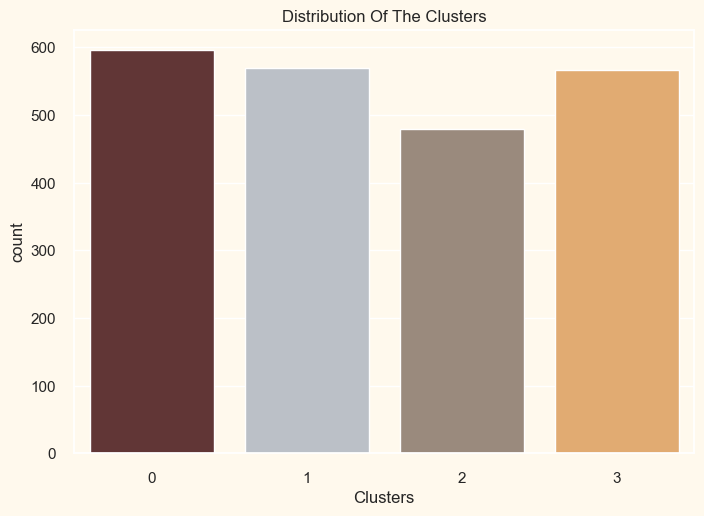

In [41]:
# Plotting countplot of Clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x = df["Clusters"], palette = pal)
pl.set_title("Distribution Of The Clusters")
plt.savefig("figures/Distribution_Of_The_Clusters.png", dpi = 300, bbox_inches = "tight")
plt.show()

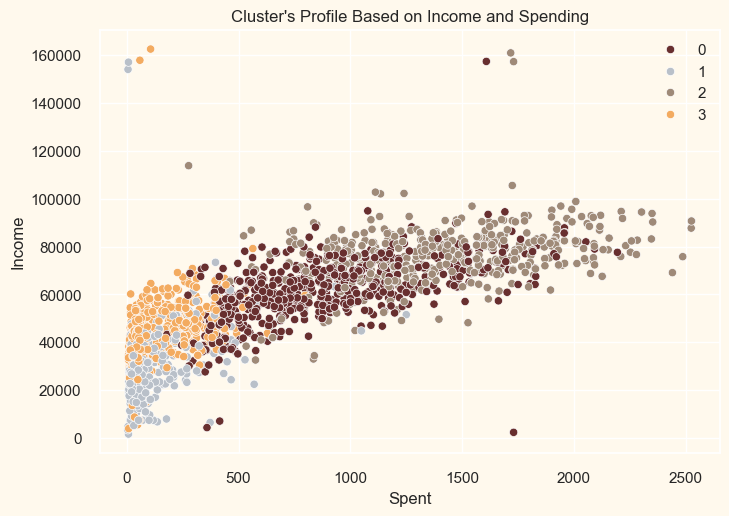

In [42]:
pl = sns.scatterplot(data = df, x = df["Spent"], y = df["Income"], hue = df["Clusters"], palette = pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.savefig("figures/Cluster's_Profile_Based_on_Income_and_Spending.png", dpi = 300, bbox_inches = "tight")
plt.legend()
plt.show()

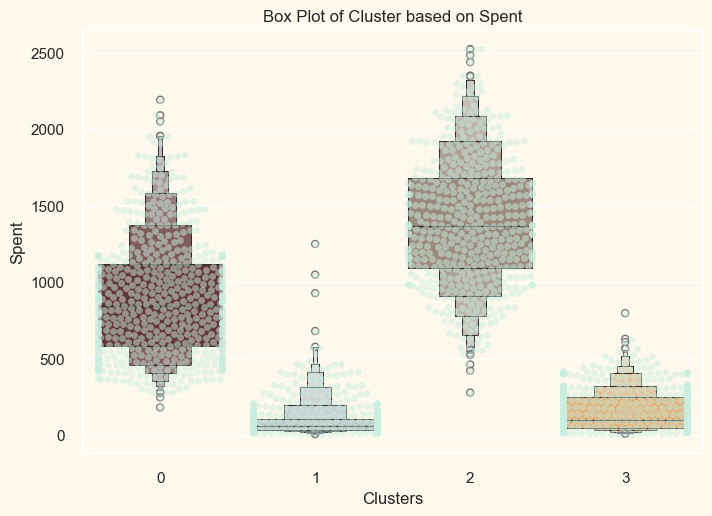

In [43]:
plt.figure()
pl = sns.swarmplot(x = df["Clusters"], y = df["Spent"], color = "#CBEDDD", alpha = 0.5)
pl = sns.boxenplot(x = df["Clusters"], y = df["Spent"], palette = pal)
pl.set_title("Box Plot of Cluster based on Spent")
plt.savefig("figures/Box_Plot_of_Cluster_based_on_Spent.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [44]:
# Creating a feature to get a sum of accepted promotions
df["Total_Promos"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] 

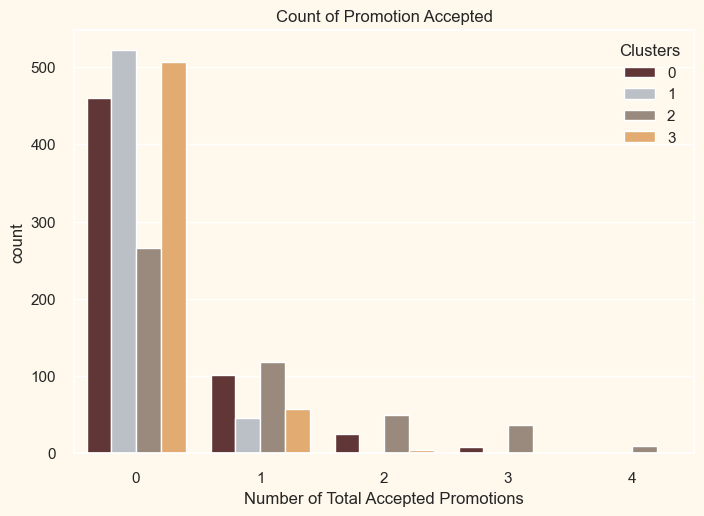

In [45]:
# Plotting count of total campaign accepted
plt.figure()
pl = sns.countplot(x = df["Total_Promos"], hue = df["Clusters"], palette = pal)
pl.set_title("Count of Promotion Accepted")
pl.set_xlabel("Number of Total Accepted Promotions")
plt.savefig("figures/Count_of_Promotion_Accepted", dpi = 300, bbox_inches = "tight")
plt.show()

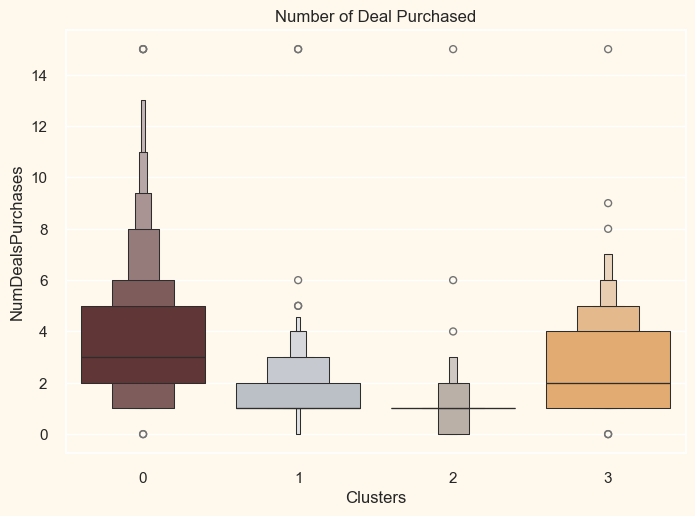

In [46]:
# Plotting the number of deals purchase
plt.figure()
pl = sns.boxenplot(y = df["NumDealsPurchases"], x = df["Clusters"], palette = pal)
pl.set_title("Number of Deal Purchased")
plt.savefig("figures/Number_of_Deal_Purchased", dpi = 300, bbox_inches = "tight")
plt.show()

### 10. Profiling

<Figure size 1500x800 with 0 Axes>

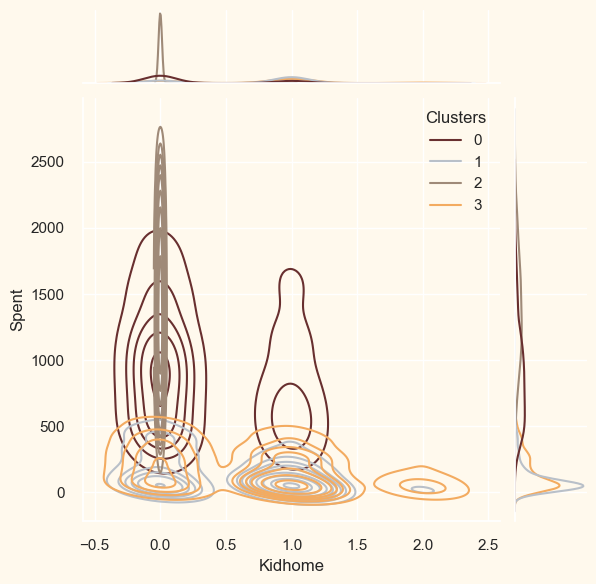

<Figure size 1500x800 with 0 Axes>

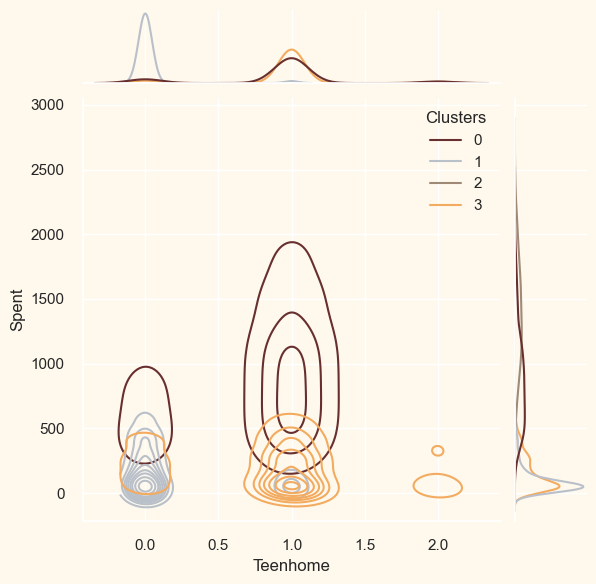

<Figure size 1500x800 with 0 Axes>

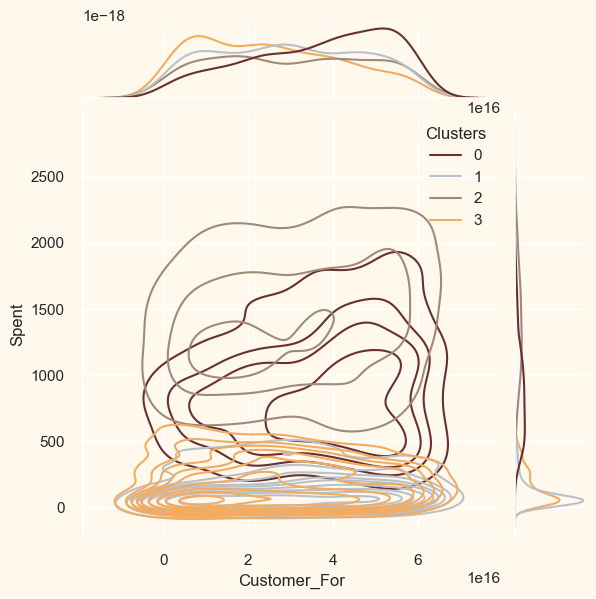

<Figure size 1500x800 with 0 Axes>

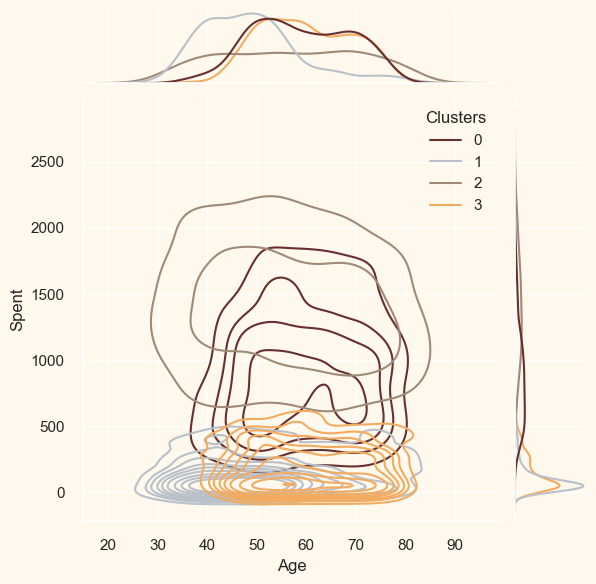

<Figure size 1500x800 with 0 Axes>

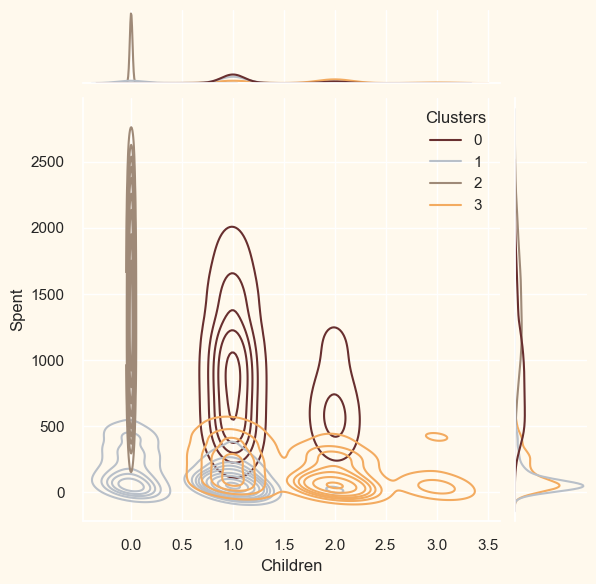

<Figure size 1500x800 with 0 Axes>

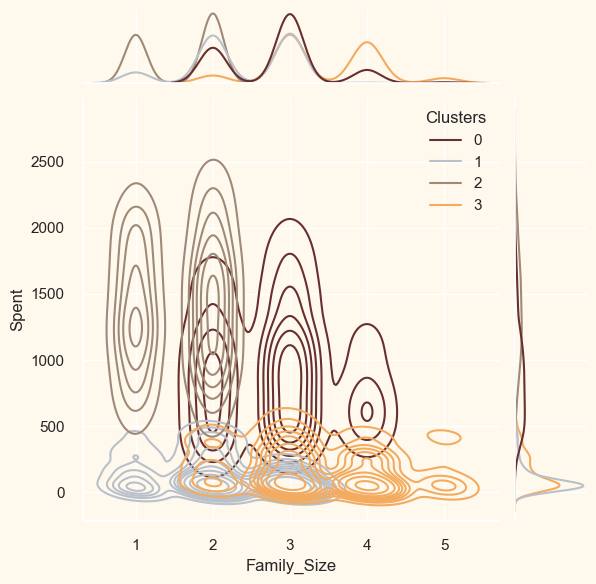

<Figure size 1500x800 with 0 Axes>

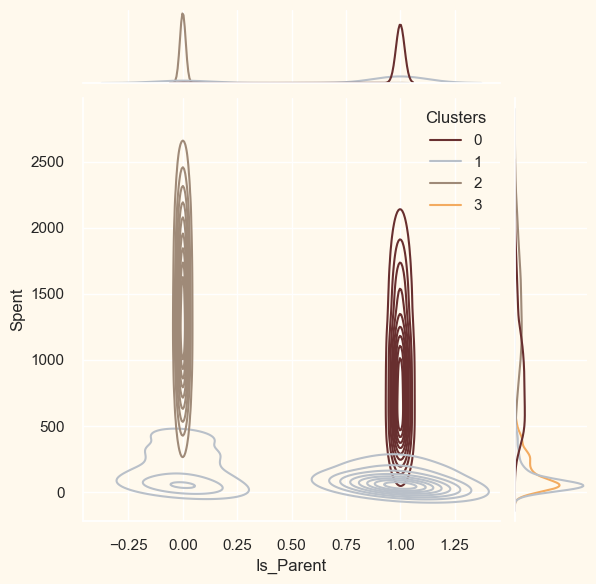

<Figure size 1500x800 with 0 Axes>

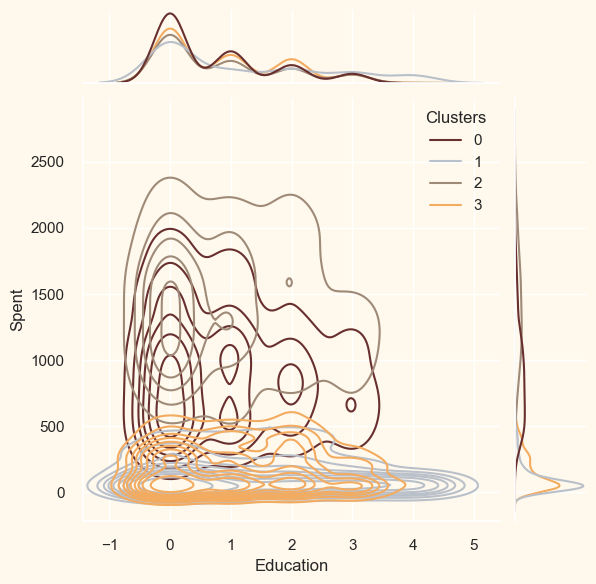

<Figure size 1500x800 with 0 Axes>

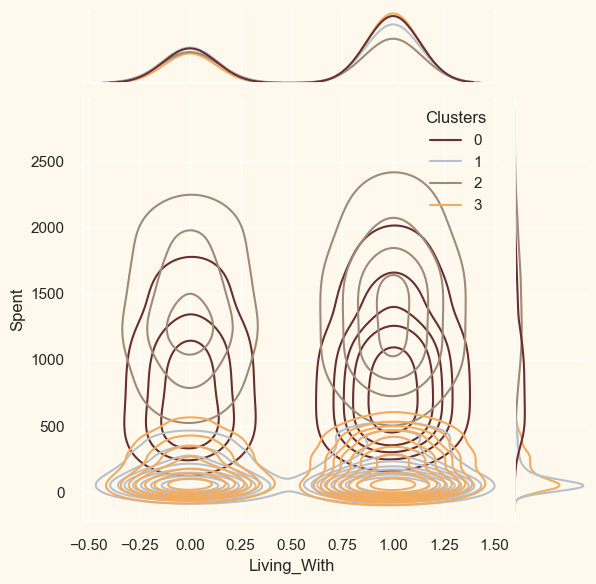

In [47]:
Personal = ["Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
title = ["Spent vs KidHome", "Spent vs TeenHome", "Spent vs Customer_For", "Spent vs Age", "Spent vs Children", "Spent vs Family_Size", "Spent vs Is_Parent",
         "Spent vs Education", "Spent vs Living_With"]
for i, t in zip(Personal, title):
    plt.figure(figsize = (15, 8))
    sns.jointplot(x = df[i], y = df["Spent"], hue = df["Clusters"], kind = "kde", palette = pal)
    plt.savefig(f"figures/{t}", dpi = 300, bbox_inches = "tight")
    plt.show()

## 11. Silhouette Score

In [48]:
# Mean of the Clusters
df.groupby('Clusters').mean()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Total_Promos
Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.741611,61697.966443,0.238255,0.927852,49.459732,516.147651,34.506711,183.833893,47.501678,36.555369,...,0.010067,0.134228,3.656996e+16,58.949664,888.469799,0.659396,1.166107,2.825503,0.994966,0.307047
1,1.189474,29837.787719,0.715789,0.028070,48.261404,34.856140,6.745614,24.750877,10.187719,6.933333,...,0.010526,0.110526,2.962186e+16,48.661404,100.619298,0.622807,0.743860,2.366667,0.735088,0.087719
2,0.822547,76219.025052,0.002088,0.000000,49.079332,617.035491,65.396660,476.400835,95.179541,66.156576,...,0.006263,0.325678,3.035508e+16,56.870564,1395.331942,0.588727,0.002088,1.590814,0.002088,0.755741
3,0.892416,43464.636684,0.751323,0.970018,49.268078,92.141093,4.417989,31.042328,6.296296,4.231041,...,0.008818,0.059965,2.536244e+16,59.878307,155.259259,0.701940,1.721340,3.423280,1.000000,0.114638


#### 11.1 Caculating Silhouette Score

In [49]:
# Silhouette Score for Current Clustering
sil_score = silhouette_score(PCA_ds[["col1", "col2", "col3"]], df["Clusters"])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.35424776915703293


#### 11.2 Comparing Silhouete Scores for K=2 to k=10

In [50]:
silhouette_scores = []
for k in range(2, 11):
    kmeans_test = KMeans(n_clusters = k, random_state = 42)
    kmeans_test.fit(PCA_ds[["col1", "col2", "col3"]])
    score = silhouette_score(PCA_ds[["col1", "col2", "col3"]], kmeans_test.labels_)
    silhouette_scores.append(score)


In [51]:
print("\nSilhouette Scores for K=2 to K=10:")
for k, score in enumerate(silhouette_scores, start = 2):
    print(f"K={k}:{score}")


Silhouette Scores for K=2 to K=10:
K=2:0.44445738484420866
K=3:0.4098854989819938
K=4:0.37317584669923287
K=5:0.3149256037553155
K=6:0.30365137516753415
K=7:0.30303548570135014
K=8:0.2900249528434519
K=9:0.2746977288346723
K=10:0.26303210133083266


#### 11.3 Plotting Silhouette Curve

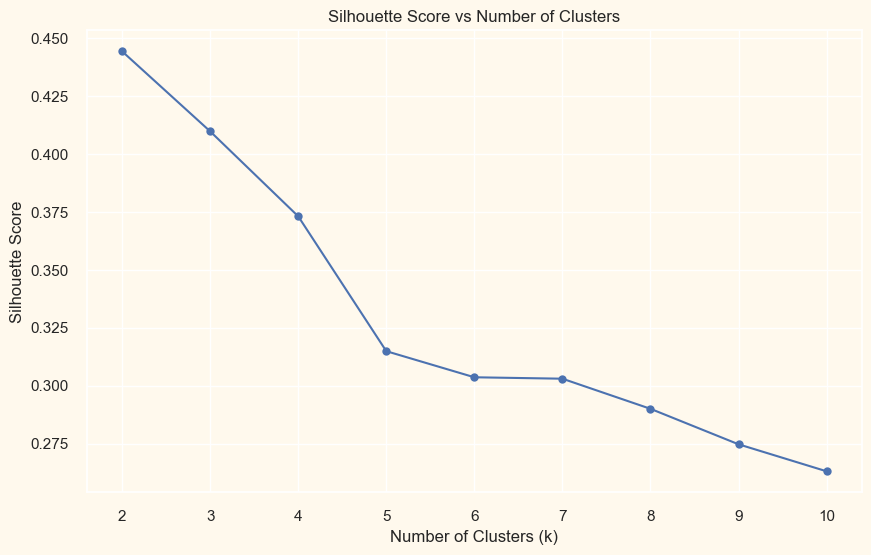

In [52]:
plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = 'o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.savefig("figures/Silhouette_Score_vs_K.png", dpi=300, bbox_inches="tight")
plt.show()

#### 11.4  3D PCA Cluster Separation - Visualizatioin

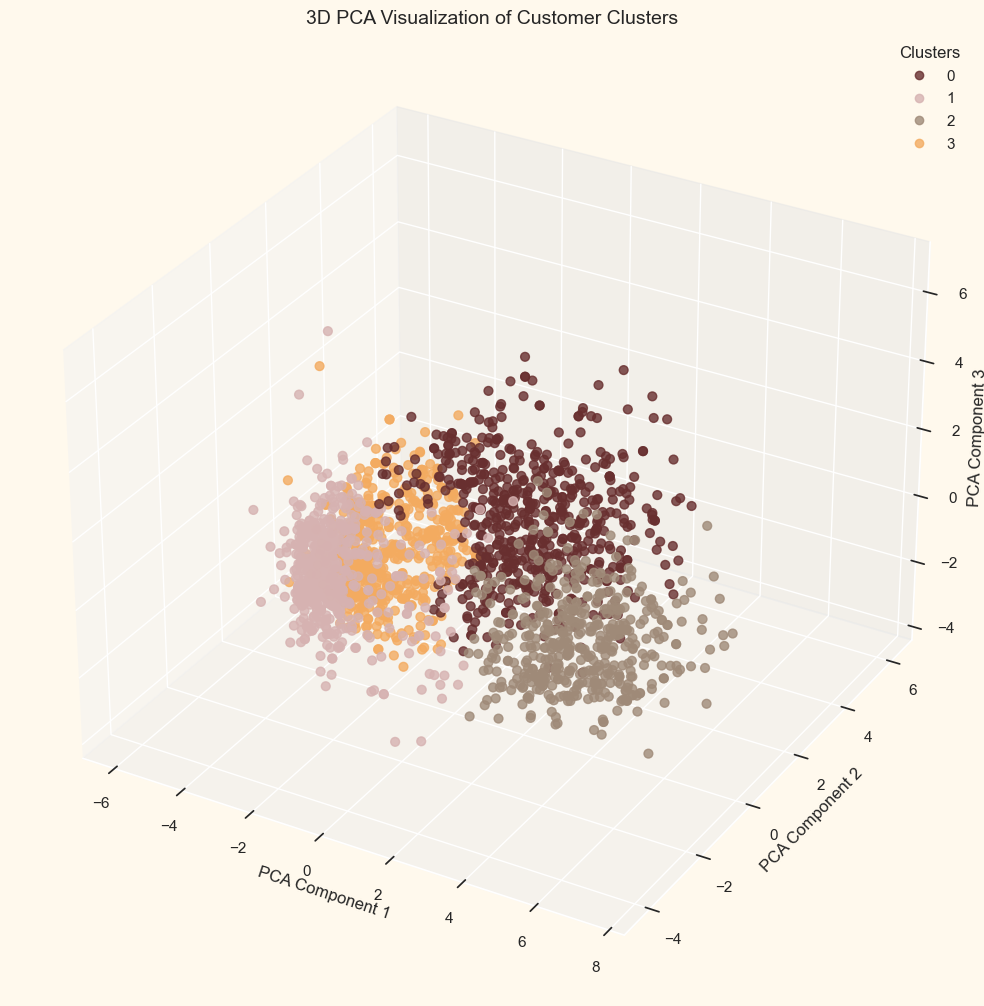

In [53]:
fig = plt.figure(figsize = (10, 11))
ax = fig.add_subplot(111, projection = '3d')
scatter = ax.scatter(PCA_ds["col1"], PCA_ds["col2"], PCA_ds["col3"], c = df["Clusters"], cmap = cmap, s = 40, alpha = 0.8)
ax.set_title("3D PCA Visualization of Customer Clusters", fontsize = 14)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
legend = ax.legend(*scatter.legend_elements(), title = "Clusters", loc = "upper right")
plt.tight_layout()
plt.savefig("figures/3D_PCA_Clusters.png", dpi=300, bbox_inches="tight")
plt.show()

#### 11.5 Average Spending Per Cluster Plot

In [54]:
cluster_spending = df.groupby("Clusters")["Spent"].mean()
print(f"Cluster Spending:\n{cluster_spending}")

Cluster Spending:
Clusters
0     888.469799
1     100.619298
2    1395.331942
3     155.259259
Name: Spent, dtype: float64


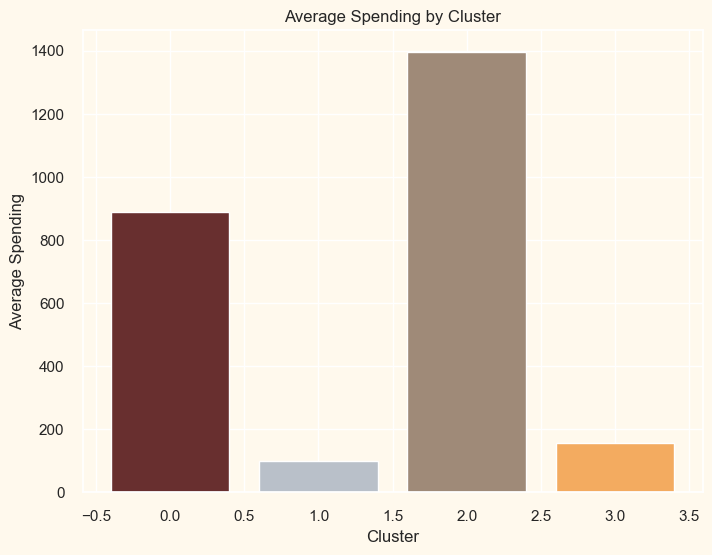

In [55]:
plt.figure(figsize = (8, 6))
plt.bar(cluster_spending.index, cluster_spending.values, color = pal)
plt.xlabel("Cluster")
plt.ylabel("Average Spending")
plt.title("Average Spending by Cluster")
plt.savefig("figures/Average_Spending_by_Cluster.png", dpi=300, bbox_inches="tight")
plt.show()

#### 11.6 Final Kmeans model

In [56]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final.fit(PCA_ds[["col1", "col2", "col3"]])
kmeans_final

KMeans(n_clusters=4, random_state=42)

## 12. Saving Models 

In [57]:
models = {
    'Scaler' : scaler,
    'PCA': pca,
    'KMeans' : kmeans_final,
    'Agglomerative' : AC,
    'Label_Encoder' : label_encoders
}

In [58]:
for path, model in models.items():
    joblib.dump(model, f"models/{path}.pkl")
    print(f"{path} Model Save successfully at - models/{path}.pkl")

Scaler Model Save successfully at - models/Scaler.pkl
PCA Model Save successfully at - models/PCA.pkl
KMeans Model Save successfully at - models/KMeans.pkl
Agglomerative Model Save successfully at - models/Agglomerative.pkl
Label_Encoder Model Save successfully at - models/Label_Encoder.pkl
